In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import random
import json
import requests
#from config import api_key


# Create a reference the CSV file desired
csv_path = "2017_peak_hours_report_kdfactor.csv"
'''PEAK HOUR VOLUME DATA Peak hour volume data consists of hourly volume relationships and data location. The hourly volumes are expressed as a percentage of the Annual Average Daily Traffic (AADT). The percentages are shown for both the AM and the PM peak periods. The principle data described here are the K factor, the D factor and their product (KD). The K factor is the percentage of AADT during the peak hour for both directions of travel. The D factor is the percentage of the peak hour travel in the peak direction. KD multiplied with the AADT gives the one way peak period directional flow rate or the design hourly volume (DHV). The design hourly volume is used for either Operational Analysis or Design Analysis. Refer to the 2016 Highway Capacity Manual, 6th Edition A Guide for Multimodal Mobility Analysis for more details.'''

# Read the CSV into a Pandas DataFrame
aadt_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
aadt_df.head()

,DI,RTE,CO,PRE,PM,CS,LEG,YR,AM_DIR,AM_WAY_PHV,...,AM_DAY,AM_MONTH,PM_DIR,PM_WAY_PHV,PM_K_FACTOR_AMT,PM_D_FACTOR_AMT,PM_KD_FACTOR,PM_HOUR,PM_DAY,PM_MONTH
0,12,1,ORA,NaN,22.500,623.0,O,17,S,2536,...,WED,NOV,N,2596,8.92,78.86,7.03,18,WED,FEB
1,12,1,ORA,NaN,30.141,937.0,A,16,N,14488,...,FRI,JUN,S,3012,7.82,75.49,5.90,19,WED,OCT
2,7,1,LA,NaN,18.090,7.0,A,15,N,1143,...,THU,OCT,S,1321,8.02,56.31,4.52,17,TUE,NOV
3,7,1,LA,NaN,27.100,425.0,O,17,N,4363,...,TUE,OCT,N,3980,7.66,62.80,4.81,17,TUE,JUN
4,7,1,LA,NaN,40.769,720.0,A,16,N,2106,...,MON,FEB,N,2742,9.64,58.20,5.61,17,TUE,JAN


In [51]:
aadt_df.shape

(1412, 24)

In [52]:
# Create a reference the CSV file desired
uber_lyft = "SF_TRAFFIC_2016.csv"
'''PEAK HOUR VOLUME DATA Peak hour volume data consists of hourly volume relationships and data location. The hourly volumes are expressed as a percentage of the Annual Average Daily Traffic (AADT). The percentages are shown for both the AM and the PM peak periods. The principle data described here are the K factor, the D factor and their product (KD). The K factor is the percentage of AADT during the peak hour for both directions of travel. The D factor is the percentage of the peak hour travel in the peak direction. KD multiplied with the AADT gives the one way peak period directional flow rate or the design hourly volume (DHV). The design hourly volume is used for either Operational Analysis or Design Analysis. Refer to the 2016 Highway Capacity Manual, 6th Edition A Guide for Multimodal Mobility Analysis for more details.'''

# Read the CSV into a Pandas DataFrame
uber_lyft_df = pd.read_csv(uber_lyft)

# Print the first five rows of data to the screen
uber_lyft_df.head()

,Unnamed: 0,ID,ModifiedTMC,TOD,YEAR,CHAMP_LINK_COUNT,PHF,ALPHA,BETA,FT2,...,FFS,INRIX_SPEED,SPEED_20TH,FF_TIME,INRIX_TIME,INRIX_VOL,CHAMP_PCE,CHAMP_VOL,TNC_VOL,TNC_PUDO
0,0,105&10491_AM,105&10491,AM,2016,2,0.348,0.60,3.5,2,...,28.467037,18.088510,10.483549,0.358309,0.563894,7660.134930,6320.848807,5793.641565,382.930621,9.324706
1,1,105&14211_AM,105&14211,AM,2016,6,0.348,0.60,8.5,4,...,25.215407,16.902508,14.949591,1.427699,2.129861,1342.742061,492.161158,459.129478,35.819280,0.315167
2,11,105+04869_AM,105+04869,AM,2016,8,0.348,0.83,8.5,1,...,67.730000,52.759624,49.480000,0.951248,1.221161,9359.350223,7463.839934,6847.118463,317.581145,0.244180
3,13,105+04873_AM,105+04873,AM,2016,1,0.348,0.60,8.5,4,...,45.930000,20.649362,7.180000,0.222077,0.493962,937.520667,229.839170,180.880750,87.934850,3.110000
4,15,105+05618_AM,105+05618,AM,2016,4,0.348,0.83,5.5,1,...,62.480000,37.604309,14.976000,0.525192,0.872613,11800.524230,7594.111413,7258.430157,51.922407,1.394222


In [53]:
# Check to see if there are any rows with missing data
# We have 1412 rows of data from 2015 to 2017 and 24 columns
aadt_df.count()

DI                 1412
RTE                1412
CO                 1412
PRE                 449
PM                 1412
CS                 1411
LEG                1412
YR                 1412
AM_DIR             1412
AM_WAY_PHV         1412
AM_K_FACTOR_AMT    1412
AM_D_FACTOR_AMT    1412
AM_KD_FACTOR       1412
AM_HOUR            1412
AM_DAY             1412
AM_MONTH           1412
PM_DIR             1412
PM_WAY_PHV         1412
PM_K_FACTOR_AMT    1412
PM_D_FACTOR_AMT    1412
PM_KD_FACTOR       1412
PM_HOUR            1412
PM_DAY             1412
PM_MONTH           1412
dtype: int64

In [54]:
uber_lyft_df.count()

Unnamed: 0          6694
ID                  6694
ModifiedTMC         6694
TOD                 6694
YEAR                6694
CHAMP_LINK_COUNT    6694
PHF                 6694
ALPHA               6694
BETA                6694
FT2                 6694
LANES               6694
DISTANCE            6694
CAPACITY            6694
FFS                 6694
INRIX_SPEED         6694
SPEED_20TH          6694
FF_TIME             6694
INRIX_TIME          6694
INRIX_VOL           6694
CHAMP_PCE           6694
CHAMP_VOL           6694
TNC_VOL             6694
TNC_PUDO            6694
dtype: int64

In [55]:
# Collect a list of traffic locations in CA
columns = [
    "DI",  # Caltrans has twelve transportation districts statewide. This abbreviation identifies the district in which the count station is located. 
    "RTE", # The state highway route number. 
    "CO", # County abbreviation used by Caltrans
    "PRE", # The postmile may have a prefix like R, T, L, M, etc. When a length of highway is changed due to construction or realigment, new postmile values are assigned. To distinguish the new values from the old, an alpha code is prefixed to the new postmile. '''
    "PM", # The Post Mile is the mileage measured from the county line, or from the beginning of a route. Each postmile along a route in a county is a unique location on the state highway system. 
    "CS", # Control Station Number, Caltrans identification number for monitoring site. 
    "LEG", # For traffic counting purposes, a highway intersection or interchange is assigned two legs according to increasing postmiles (route direction) and with a postmile reference at the center of the intersection or interchange. 
    #  The volume of traffic on each leg is denoted by an A, B or O. 
    #  A = ahead leg, B = back leg, and O – traffic volume being same for both back and ahead legs.    
    "YR", # The year when the count was made. Traffic counting is on a 3-year cycle.
    "AM_DIR",   # Indicates direction of travel for peak volume.
    "AM_WAY_PHV",  # Peak Hour Volume in the peak direction. A one way volume in vehicles per hour (vph) as used here. The PHV is analogous to the DDHV as used for design purposes
    "AM_K_FACTOR_AMT", # The percentage of the AADT in both directions during the peak hour. Values in this table are derived by dividing the measured 2-way PHV by the AADT.
    "AM_D_FACTOR_AMT", #  D factor. The percentage of traffic in the peak direction during the peak hour.  Values in this book are derived by dividing the measured PHV by the sum of both directions of travel during the peak hour.
    "AM_KD_FACTOR",   #  The product of K and D. The percentage of AADT in the peak direction during the peak hour. Values in this table are derived by dividing the measured 1-way PHV by the AADT. 
    "AM_HOUR", 
    "AM_DAY",
    "AM_MONTH",
    "PM_DIR", 
    "PM_WAY_PHV",
    "PM_K_FACTOR_AMT",
    "PM_D_FACTOR_AMT",
    "PM_KD_FACTOR",
    "PM_HOUR",
    "PM_DAY",
    "PM_MONTH"
]

In [56]:
# Create a group based on the routes and mile post in California
aadt_group = aadt_df.groupby(['CO','RTE','PM'])

# look at count per location
print(f"aadt_group.count={aadt_group.count()}")

# o-Count how many times each location appears in our group

aadt_group.count=                DI  PRE  CS  LEG  YR  AM_DIR  AM_WAY_PHV  AM_K_FACTOR_AMT  \
CO  RTE PM                                                                  
ALA 13  4.262    1    0   1    1   1       1           1                1   
        13.906   1    0   1    1   1       1           1                1   
    61  18.520   1    0   1    1   1       1           1                1   
    77  0.098    1    0   1    1   1       1           1                1   
    80  1.989    1    0   1    1   1       1           1                1   
    84  26.215   1    1   1    1   1       1           1                1   
    580 10.689   1    0   1    1   1       1           1                1   
        30.354   1    0   1    1   1       1           1                1   
    680 1.961    1    1   1    1   1       1           1                1   
        20.057   1    1   1    1   1       1           1                1   
ALP 89  23.972   1    0   1    1   1       1           1   

In [57]:
aadt3_df = aadt_df.loc[aadt_df["CO"] == "SF", columns]
aadt3_df

,DI,RTE,CO,PRE,PM,CS,LEG,YR,AM_DIR,AM_WAY_PHV,...,AM_DAY,AM_MONTH,PM_DIR,PM_WAY_PHV,PM_K_FACTOR_AMT,PM_D_FACTOR_AMT,PM_KD_FACTOR,PM_HOUR,PM_DAY,PM_MONTH
32,4,1,SF,NaN,4.050,103.0,B,16,N,2535,...,SAT,OCT,S,2505,6.70,52.55,3.52,16,TUE,JAN
868,4,101,SF,NaN,5.322,110.0,B,16,S,1725,...,THU,NOV,N,1691,6.21,59.40,3.69,17,THU,AUG
869,4,101,SF,NaN,5.940,111.0,A,16,N,1484,...,FRI,MAY,N,1963,6.68,68.07,4.55,17,FRI,MAY
1301,4,280,SF,R,0.000,112.0,A,17,N,6420,...,THU,OCT,S,6544,8.68,53.51,4.64,15,FRI,OCT


In [58]:
# Collect a list of traffic locations in CA
columns = [
"ID",
"ModifiedTMC",
"TOD",
"YEAR",
"CHAMP_LINK_COUNT",
"PHF",
"ALPHA",
"BETA",
"FT2",
"LANES",
"DISTANCE",
"CAPACITY",
"FFS",
"INRIX_SPEED",
"SPEED_20TH",
"FF_TIME",
"INRIX_TIME",
"INRIX_VOL",
"CHAMP_PCE",
"CHAMP_VOL",
"TNC_VOL"
"TNC_PUDO"   
]

# ID - a unique ID, which is a combination of the next two fields
# ModifiedTMC	- ID for the spatial unit of analysis, a directional section of roadway
# TOD	- Time-of-day: AM=6-9 AM, MD=9 AM-3:30 PM, PM=3:30-6:30 PM, EV=6:30 PM-3:00 AM, EA=3-6 AM
# YEAR - The year, either 2010 or 2016
# CHAMP_LINK_COUNT - The number of SF-CHAMP links that aggregate to this ModifiedTMC
# PHF	- Peak Hour Factor, the share of the total period volume that occurs in the highest 1-hour period
# ALPHA - alpha term for use in VDF(volume-delay functions, the probability of Type I error in any hypothesis test–incorrectly rejecting the null hypothesis.)
# BETA - beta term for use in VDF (volume-delay functions, the probability of Type II error in any hypothesis test–incorrectly failing to reject the null hypothesis)
# AT - Area Type: 0=Regional Core, 1=Central Business Distritc, 2=Urban Business, 3=Urban
# FT2 - Facility Type: 1-Freeway, Expressway or Ramp, 2=Major Arterial, 3=Minor Arterial, 4=Local or Collector
# LANES - Number of lanes (can be non-integer due to averaging across SF-CHAMP links)
# DISTANCE - distance in miles
# CAPACITY - capacity in vehicles for the period as a whole
# FFS	- free flow speed
# INRIX_SPEED	- average speed, as measured by INRIX data
# SPEED_20TH - 20th percentile speed, as measured by INRIX data
# FF_TIME	- free flow travel time
# INRIX_TIME - average travel time, as measured by INRIX data
# INRIX_VOL - implied volume
# CHAMP_PCE - SF-CHAMP passenger car equivalents (PCEs)
# CHAMP_VOL - SF-CHAMP volume (vehicles)
# TNC_VOL	- TNC volume(transportation network companies,uber, lyft)
# TNC_PUDO - TNC pick-ups and drop-offs

In [59]:
# uber_lyft_group = uber_lyft_df.groupby(['TNC_PUDO','TNC_VOL'])
# gov_data_time = uber_lyft_df.groupby(['FF_TIME','INRIX_TIME'])
# gov_data_volume = uber_lyft_df.groupby(['CHAMP_VOL','INRIX_VOL'])
# gov_data_speed = uber_lyft_df.groupby(['FFS','INRIX_SPEED'])

# traffic_sf_df = pd.DataFrame({'uber_lyft_group': [uber_lyft_group], 'gov_data_time': [gov_data_time], 'gov_data_speed': [gov_data_speed], 'gov_data_volume': [gov_data_volume] })

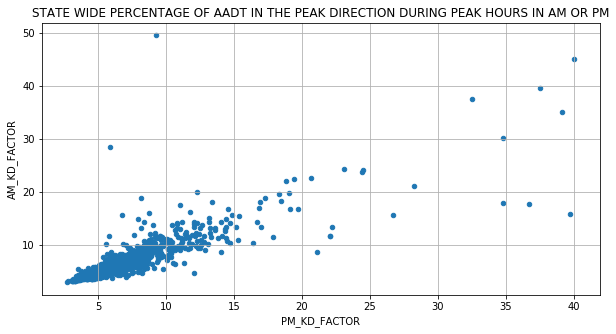

In [60]:
# Create a scatter plot which compares PM PHV  to AM PHV for all highways
aadt_df.plot(kind="scatter", x="PM_KD_FACTOR", y="AM_KD_FACTOR", grid=True, figsize=(10,5),
              title="STATE WIDE PERCENTAGE OF AADT IN THE PEAK DIRECTION DURING PEAK HOURS IN AM OR PM")
plt.show()
# 1412 records of AADT with route and mile post; no lat and long
# Plot indicates 2% to 20% OF daily traffic occurs in peak morning hour
# 3% to 15% of daily traffic occurs in peak evening hour.

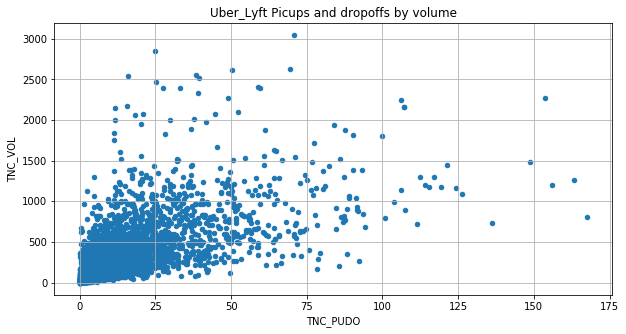

In [61]:
uber_lyft_df.plot(kind="scatter", x="TNC_PUDO", y="TNC_VOL", grid=True, figsize=(10,5),
              title="Uber_Lyft Picups and dropoffs by volume")
plt.show()

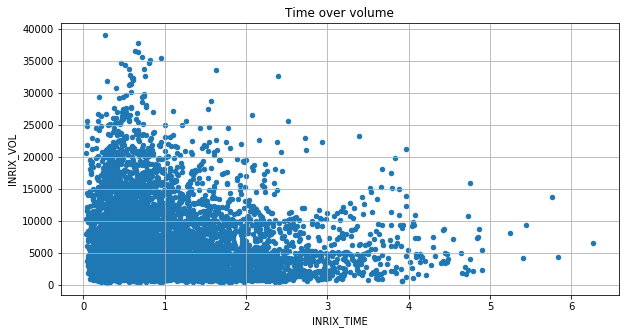

In [62]:
uber_lyft_df.plot(kind="scatter", x="INRIX_TIME", y="INRIX_VOL", grid=True, figsize=(10,5),
              title="Time over volume")
plt.show()

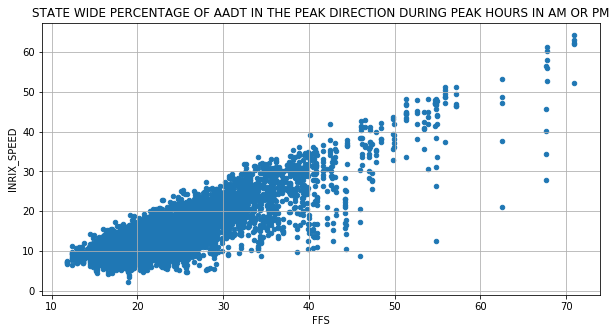

In [63]:
uber_lyft_df.plot(kind="scatter", x="FFS", y="INRIX_SPEED", grid=True, figsize=(10,5),
              title="STATE WIDE PERCENTAGE OF AADT IN THE PEAK DIRECTION DURING PEAK HOURS IN AM OR PM")
plt.show()

In [64]:
# Set x axis and tick locations
x_axis = np.arange(len(aadt3_df))
tick_locations = [value for value in x_axis]

In [65]:
#create summary 
County_sum = (aadt_df.groupby("CO")["AM_WAY_PHV"].count())
AM_max = (aadt_df.groupby("CO")["AM_WAY_PHV"].max())
PM_max = (aadt_df.groupby("CO")["PM_WAY_PHV"].max())
AM_avg = (aadt_df.groupby("CO")["AM_WAY_PHV"].mean().round(2))
PM_avg = (aadt_df.groupby("CO")["PM_WAY_PHV"].mean().round(2))
AM_min = (aadt_df.groupby("CO")["AM_WAY_PHV"].min())
PM_min = (aadt_df.groupby("CO")["PM_WAY_PHV"].min())

ca_df = pd.DataFrame({'AM max PHV': AM_max, 'PM max PHV': PM_max, 'AM avg PHV': AM_avg, 'PM avg PHV': PM_avg, 'AM min PHV': AM_min, 'PM min PHV': PM_min })
ca_df


,AM max PHV,PM max PHV,AM avg PHV,PM avg PHV,AM min PHV,PM min PHV
CO,,,,,,
ALA,9749,10713,4914.70,4997.30,939,852
ALP,372,706,372.00,706.00,372,706
AMA,703,818,536.75,660.00,408,566
BUT,3778,4259,878.08,935.88,81,93
CAL,489,431,329.00,313.33,94,90
CC,9880,10782,5391.31,5470.38,772,502
COL,1852,2061,577.20,663.80,45,51
DN,591,634,367.00,397.67,208,221
ED,3259,3521,1064.67,1114.17,235,250


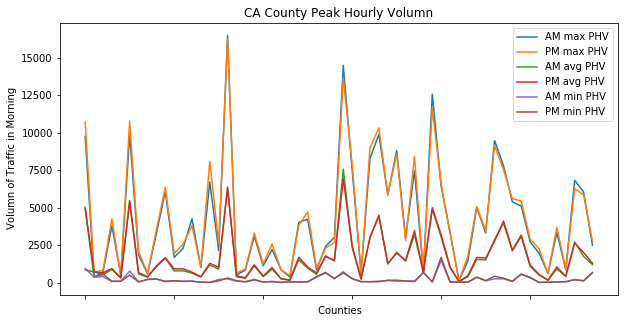

<Figure size 432x288 with 0 Axes>

In [66]:
# Plot Data 
ca_df.plot(kind="line", figsize=(10,5))

# Set a title for the chart
plt.title("CA County Peak Hourly Volumn")
plt.xlabel(" Counties")
plt.ylabel(" Volumn of Traffic in Morning")

#Add the legend.
legend = plt.legend(loc = "best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.show()
plt.tight_layout()

In [67]:
# # Plot Data 
# traffic_sf_df.plot(kind="line", figsize=(10,5))

# # Set a title for the chart
# plt.title("Uber-Lyft Pick-ups and Volume")
# plt.xlabel("Volume")
# plt.ylabel("Pickups")

# #Add the legend.
# legend = plt.legend(loc = "best")
# legend.legendHandles[0]._sizes = [30]
# legend.legendHandles[1]._sizes = [30]
# legend.legendHandles[2]._sizes = [30]

# plt.show()
# plt.tight_layout()


In [68]:
#create summary 
County_sum = (aadt_df.groupby("CO")["AM_WAY_PHV"].count())
AM_max = (aadt_df.groupby("CO")["AM_WAY_PHV"].max())
PM_max = (aadt_df.groupby("CO")["PM_WAY_PHV"].max())
AM_avg = (aadt_df.groupby("CO")["AM_WAY_PHV"].mean().round(2))
PM_avg = (aadt_df.groupby("CO")["PM_WAY_PHV"].mean().round(2))
AM_min = (aadt_df.groupby("CO")["AM_WAY_PHV"].min())
PM_min = (aadt_df.groupby("CO")["PM_WAY_PHV"].min())

ca_df = pd.DataFrame({'AM max PHV': AM_max, 'PM max PHV': PM_max, 'AM avg PHV': AM_avg, 'PM avg PHV': PM_avg, 'AM min PHV': AM_min, 'PM min PHV': PM_min })
ca_df

,AM max PHV,PM max PHV,AM avg PHV,PM avg PHV,AM min PHV,PM min PHV
CO,,,,,,
ALA,9749,10713,4914.70,4997.30,939,852
ALP,372,706,372.00,706.00,372,706
AMA,703,818,536.75,660.00,408,566
BUT,3778,4259,878.08,935.88,81,93
CAL,489,431,329.00,313.33,94,90
CC,9880,10782,5391.31,5470.38,772,502
COL,1852,2061,577.20,663.80,45,51
DN,591,634,367.00,397.67,208,221
ED,3259,3521,1064.67,1114.17,235,250


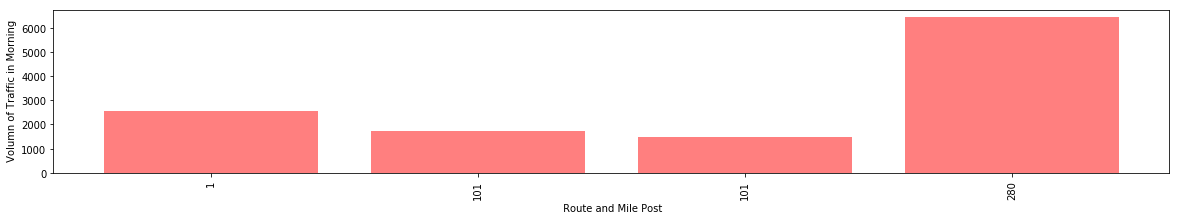

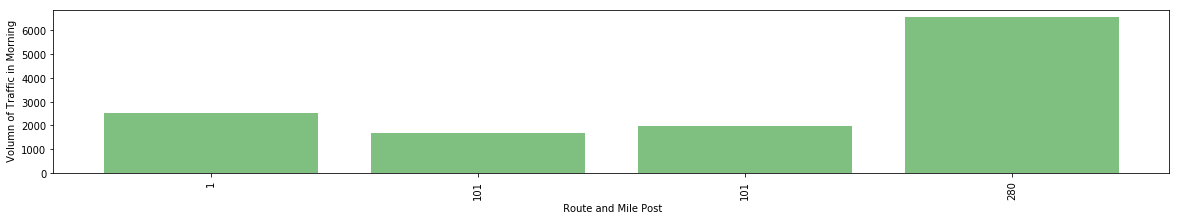

In [69]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Morning")
plt.bar(x_axis, aadt3_df["AM_WAY_PHV"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, aadt3_df["RTE"], rotation="vertical")

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Morning")
plt.bar(x_axis, aadt3_df["PM_WAY_PHV"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, aadt3_df["RTE"], rotation="vertical")

plt.show()

In [70]:
PM_PHV =(aadt3_df["PM_WAY_PHV"].max())
PM_PHV, " VEHICLES LEAVE SF ON HWY 280 IN THE EVENING COMMUTE"

(6544, ' VEHICLES LEAVE SF ON HWY 280 IN THE EVENING COMMUTE')

In [83]:
FFS =(uber_lyft_df["FFS"].mean())
FFS, "Average Speed in San Francisco"

(24.591050339214167, 'Average Speed in San Francisco')

In [72]:
AM_PHV =(aadt_df["AM_WAY_PHV"].max())
AM_PHV, " VEHICLES COME TO SF USING HWY 280 DURING MORNING COMMUTE"

(16484, ' VEHICLES COME TO SF USING HWY 280 DURING MORNING COMMUTE')

In [87]:
INRIX_TIME =(uber_lyft_df["INRIX_TIME"].mean())
INRIX_TIME, "Inner City Travel Time (Minutes), getting from any one zone to another"

(1.1073061855076176, 'Inner City Travel Time (Minutes)')

In [74]:
PM_PHV =(aadt3_df["PM_WAY_PHV"].max())
"HIGHEST TRAFFIC ON ROUTE 280 IN THE EVENING IS ", PM_PHV

('HIGHEST TRAFFIC ON ROUTE 280 IN THE EVENING IS ', 6544)

In [91]:
TNC_VOL =(uber_lyft_df["TNC_VOL"].mean())
"Average volume of traffic at all measured locations for Uber and Lyft", TNC_VOL

('Average volume of traffic at all measured locations for Uber and Lyft',
 207.63595528444813)

In [92]:
TNC_PUDO =(uber_lyft_df["TNC_PUDO"].mean())
"Average distance from pick-ups to drop-offs in all locations", TNC_PUDO

('Average number of pick-ups and drop-offs in all locations',
 8.553475209193607)

In [93]:
# Set x axis and tick locations
x_axis = np.arange(len(aadt3_df))
tick_locations = [value for value in x_axis]

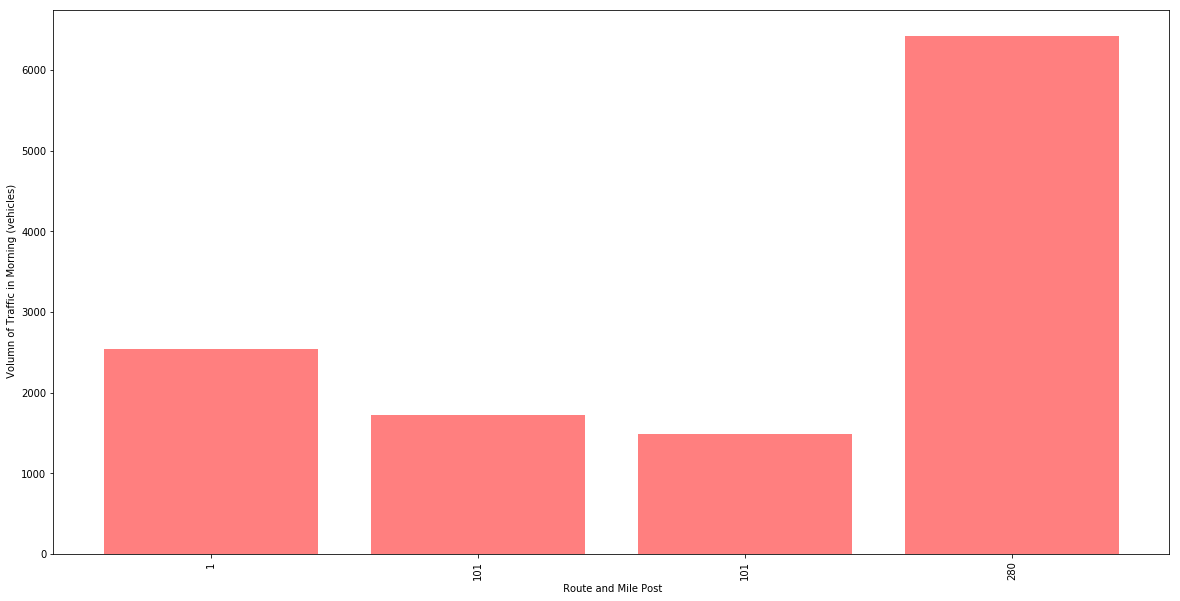

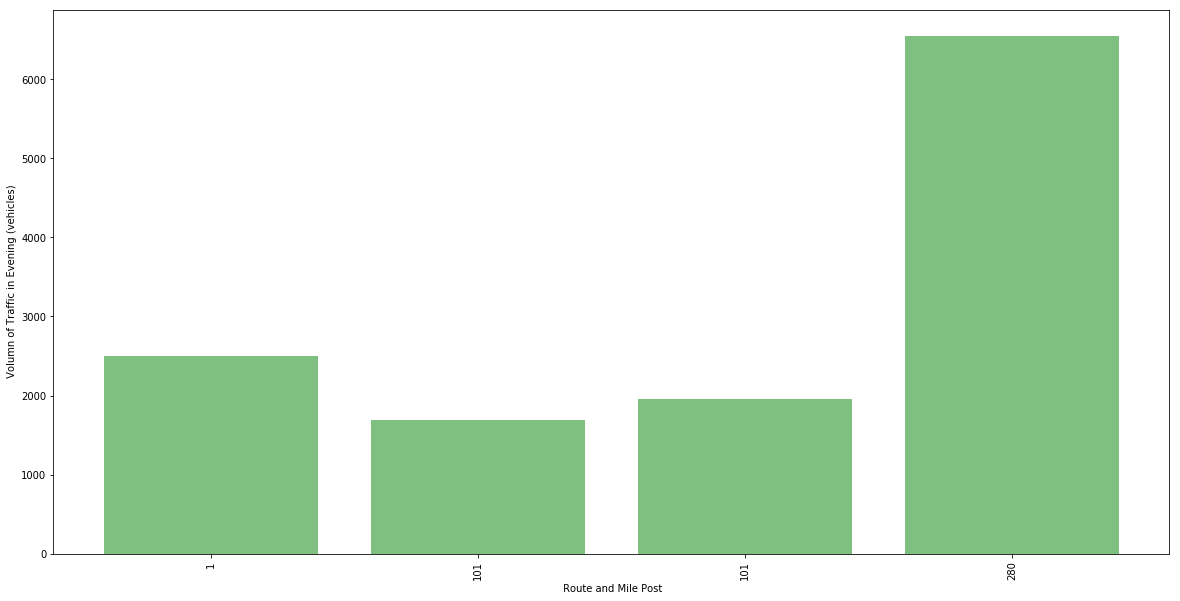

In [94]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Morning (vehicles)")
plt.bar(x_axis, aadt3_df["AM_WAY_PHV"], color='r', alpha=.5, align="center")
plt.xticks(tick_locations, aadt3_df["RTE"], rotation="vertical")

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Evening (vehicles)")
plt.bar(x_axis, aadt3_df["PM_WAY_PHV"], color='g', alpha=.5, align="center")
plt.xticks(tick_locations, aadt3_df["RTE"], rotation="vertical")

plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

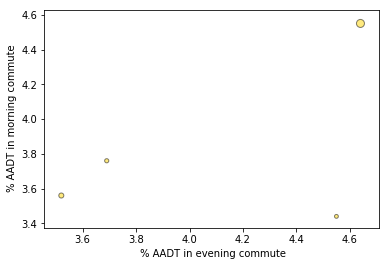

In [79]:
# The maximum x value for LA data only
x_limit = 20000000
y_limit = 20000000

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by percent of AADT at peak hour

plt.xlabel(" % AADT in evening commute")
plt.ylabel(" % AADT in morning commute")

plt.scatter(aadt3_df["PM_KD_FACTOR"], aadt3_df["AM_KD_FACTOR"],  marker="o", facecolors="gold", edgecolors="black",
            s=aadt3_df["AM_WAY_PHV"]/100, alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

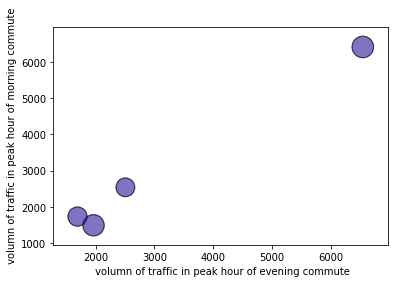

In [96]:
# The compare traffic volumn LA and SF
x_limit = 200000000
y_limit = 2000000
plt.xlabel(" volumn of traffic in peak hour of evening commute")
plt.ylabel(" volumn of traffic in peak hour of morning commute")

# LA
# The size of each point on our plot is determined by their x value
plt.scatter(aadt3_df["PM_WAY_PHV"], aadt3_df["AM_WAY_PHV"], marker="o", facecolors="gold", edgecolors="black",
            s=aadt3_df["PM_KD_FACTOR"]*100, alpha=0.5)
# SF
# The size of each point on our plot is determined by their x value
plt.scatter(aadt3_df["PM_WAY_PHV"], aadt3_df["AM_WAY_PHV"], marker="o", facecolors="blue", edgecolors="black",
            s=aadt3_df["PM_KD_FACTOR"]*100, alpha=0.5)

# LA has higher volumn of traffic
# LA has higher percentage of traffic traveling during commute hours
plt.show

In [97]:
# Save config informationfor open weather API
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city1 = "San Francisco"

# Build query URL
# query_url = url + "appid=" + api_key + "&q=" + city1

In [98]:
# Get weather data for SF from OPEN WEATHER API
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

In [99]:
# Print the output of the JSON
# print(json.dumps(weather_json, indent=4, sort_keys=True))

In [100]:
# Save config information for LA   from OPEN WEATHER API
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city2 = "Los Angeles"

# Build query URL
# query_url = url + "appid=" + api_key + "&q=" + city2

In [101]:
# Get weather data for LA
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

In [102]:
# Print the output of the JSON
# print(json.dumps(weather_json, indent=4, sort_keys=True))

In [103]:
######################################################################################################################

In [104]:
######################################################################################################################

In [105]:
######################################################################################################################

In [106]:
# Street_Pavement_Condition Legend
# Field Name Data / Type / Definition Notes (optional)
#   "CNN"           Number    CNN of street segment or intersection location
# "STREET"          Text / VarChar      Street name
# "PCI_Score"       Number    Paving Condition Index Score
# "From_Street"     Text      Cross street 1
# "To_Street"       Text      Cross street 2
# "PCI_Change_Date" Date      Date condition score last updated
# Street_Accepted_For_Maintenance     Yes/No      Street accepted for maintenance by Public Works
# "Functional_Class" Text
# The functional class of the street segment:
# Arterial, Collector or Residential.

In [107]:
# Column Name      Description                 Type
#   "CNN"   unique street centerline ID       Number
# "STREET"  street name                       Plain Text / VarChar
# "ST_TYPE" street type                       Plain Text
# "NHOOD"   neighborhood the street segment is in / Plain Text  
# "CNNTEXT" CNN as a text field              Plain Text              
# "shape"                                    Line-String

In [108]:
# Extract CSVs into DataFrames

In [109]:
# Extract Street_Pavement_Condition.csv into DataFrames (City Infrastructure)
SPC_file = "Street_Conditions_2017.csv"
Street_Condition_df = pd.read_csv(SPC_file)
Street_Condition_df.head(10)

,CNN,STREET,PCI_Score,From_Street,To_Street,PCI_Change_Date,Treatment_or_Survey,Street_Accepted_For_Maintenance,Functional_Class
0,8321000,Liberty St,100,Valencia St,Guerrero St,12/28/17,Treatment,Yes,Residential
1,33124000,HUMBOLDT ST,100,VERMONT ST,Intersection,12/27/17,Treatment,No,NaN
2,51760000,Bay Shore Blvd On Ramp: Hwy 101 S On Ramp \ Po...,100,HWY 101 S ON RAMP \ POTRERO AVE,Intersection,12/27/17,Treatment,No,NaN
3,13219000,Vermont St,100,22nd St,Humboldt St,12/27/17,Treatment,Yes,Residential
4,13220000,Vermont St,100,Humboldt St,23rd St,12/27/17,Treatment,Yes,Residential
5,8436000,Lombard St,100,Child St,Julius St,12/18/17,Treatment,Yes,Residential
6,11583000,Santa Paula Ave,100,Santa Monica Way,Terrace Walk \ Yerba Buena Ave,12/18/17,Treatment,Yes,Residential
7,13524002,Webster St,100,Rose St,Page St,12/18/17,Treatment,Yes,Arterial
8,11582000,Santa Paula Ave,100,Portola Dr,Santa Monica Way,12/18/17,Treatment,Yes,Residential
9,13524001,Webster St,100,Haight St,Rose St,12/18/17,Treatment,Yes,Arterial


In [110]:
# Extract Rush_Hour_Routes.csv into Dataframes
RH_file = "Rush_Hour_Routes.csv"
Rush_Hour_Routes_df = pd.read_csv(RH_file)
Rush_Hour_Routes_df.head(10)

,CNN,Street_name,ST_TYPE,NHOOD,CNNTEXT,shape
0,164000,03RD,ST,Financial District South,164000,LINESTRING (-122.40302819316682 37.78702441841...
1,171000,03RD,ST,Financial District South,171000,LINESTRING (-122.39794293881961 37.78299789708...
2,170000,03RD,ST,Financial District South,170000,LINESTRING (-122.39893033171637 37.78378493342...
3,174000,03RD,ST,Financial District South,174000,LINESTRING (-122.39637951941779 37.78175028392...
4,168000,03RD,ST,Financial District South,168000,LINESTRING (-122.40046848439732 37.78503028445...
5,175000,03RD,ST,Financial District South,175000,LINESTRING (-122.39584349887906 37.78132125731...
6,172000,03RD,ST,Financial District South,172000,LINESTRING (-122.39738553904088 37.78255359330...
7,173000,03RD,ST,Financial District South,173000,LINESTRING (-122.39684142722312 37.78211912139...
8,169000,03RD,ST,Financial District South,169000,LINESTRING (-122.3994598243438 37.784213640305...
9,166000,03RD,ST,Financial District South,166000,LINESTRING (-122.40202541968891 37.78624815175...


In [111]:
# Transform Street_Condition_df DataFrame

In [112]:
# Create a filtered dataframe from specific columns
SPC_cols = ["STREET","CNN","Street_Accepted_For_Maintenance"]
SPC_transformed = Street_Condition_df[SPC_cols].copy()

# Rename the column headers
SPC_transformed = SPC_transformed.rename(columns={"STREET":"Street",
                                                  "CNN":"Cnn",
                                                  "Street_Accepted_For_Maintenance":"Street_Maintenance"})

# Clean the data by dropping duplicates and setting the index
SPC_transformed.drop_duplicates("Cnn", inplace=True)
SPC_transformed.set_index("Cnn", inplace=True)

SPC_transformed.head()

,Street,Street_Maintenance
Cnn,,
8321000,Liberty St,Yes
33124000,HUMBOLDT ST,No
51760000,Bay Shore Blvd On Ramp: Hwy 101 S On Ramp \ Po...,No
13219000,Vermont St,Yes
13220000,Vermont St,Yes


In [113]:
# Transform Rush_Hour_Routes_df Dataframe

In [114]:
# Create a filtered dataframe from specific columns
RH_Routes_cols = ["Street_name","CNN", "NHOOD"]
RH_Routes_transformed = Rush_Hour_Routes_df[RH_Routes_cols].copy()

# Rename the column headers
RH_Routes_transformed = RH_Routes_transformed.rename(columns={"Street_name":"Street",
                                               "CNN":"Cnn",
                                               "NHOOD":"Neighborhood"}) 
# Set Index
RH_Routes_transformed.set_index("Cnn", inplace=True)
RH_Routes_transformed.head()

,Street,Neighborhood
Cnn,,
164000,03RD,Financial District South
171000,03RD,Financial District South
170000,03RD,Financial District South
174000,03RD,Financial District South
168000,03RD,Financial District South


In [115]:
# Create database , table schema , queries via PostgresSQL / Create Database connection 

In [116]:
connection_string = "postgres:password@localhost:5432/Traffic_db"
engine = create_engine(f'postgresql://{connection_string}')

In [117]:
# Confirm tables (Street_Condition) & (Rush_Hour)
engine.table_names()

OperationalError: (psycopg2.OperationalError) FATAL:  password authentication failed for user "postgres"
 (Background on this error at: http://sqlalche.me/e/e3q8)

In [118]:
# Load DataFrames into PostgresSQL database

In [119]:
SPC_transformed.to_sql(name='Street_Condition', con=engine, if_exists='append', index=True)

OperationalError: (psycopg2.OperationalError) FATAL:  password authentication failed for user "postgres"
 (Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
RH_Routes_transformed.to_sql(name='Rush_Hour_Routes', con=engine, if_exists='append', index=True)